In [26]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Исходные данные
#Характеристики наблюдаемых величин
np.random.seed(0)
#Нормальное распределение
m1 = -1
std1 = 2
n1 = 100
#Равномерное распределение
A = -2
B = 0
m2 = (A + B) / 2
std2 =((((B - A)**2) / 12)**0.5)
n2 = 100
alpha = 0.05

H0_std = 2
sample1=sts.norm.rvs(loc=m1, scale=std1, size=n1)
sample2=sts.uniform.rvs(loc=A, scale=B-A, size=n2)
general = np.concatenate((sample1, sample2), axis=0)

In [6]:
#Выборочные характеристики
nobs1, minmax1, mean1, variance1, skew1, kurt1 = sts.describe(sample1)
nobs2, minmax2, mean2, variance2, skew2, kurt2 = sts.describe(sample2)
nobs, minmax, mean, variance, skew, kurt = sts.describe(general)
print('Нормальное:', mean1, variance1, variance1**0.5)
print('Равномерное:', mean2, variance2, variance2**0.5)
print('pooled:', mean, variance, variance**0.5)

Нормальное: -0.8803839689310301 4.1043499766259846 2.0259195385370035
Равномерное: -1.010672364911897 0.3250360530171952 0.5701193322605322
pooled: -0.9455281669214634 2.2078289961861217 1.4858765077172873


In [11]:
def ztest(x, m, sig):
    stat = len(x)**0.5 * (np.mean(x)-m) / sig
    p = 2 * min(sts.norm.cdf(stat), 1 - sts.norm.cdf(stat))
    return stat, p

def ttest(x, m, sig):
    stat = len(x)**0.5 * (np.mean(x)-m) / sig 
    p = 2 * min(sts.t.cdf(stat, len(x)-1), 1 - sts.t.cdf(stat, len(x)-1))
    return stat, p

In [17]:
#Однопараметрические критерии
#Z-test
print('Z-test:', ztest(sample1, m1, H0_std))
#T-test
print('T-test:', ttest(sample1, m1, H0_std))
#Хи-квадрат при известном матожидании
chi = sum((sample1 - m1)**2) / H0_std**2
p_value = 2 * min(1 - sts.chi2.cdf(chi, df=n1), sts.chi2.cdf(chi, df=n1))
print('Хи-квадрат при известном матожидании:', chi, p_value)
#Хи-квадрат при неизвестном матожидании
chi = sum((sample1 - mean1)**2) / H0_std**2
p_value = 2 * min(1 - sts.chi2.cdf(chi, df=n1-1), sts.chi2.cdf(chi, df=n1-1))
print('Хи-квадрат при неизвестном матожидании:', chi, p_value)

Z-test: (0.5980801553448495, 0.5497864508624171)
T-test: (0.5980801553448495, 0.5511522350120843)
Хи-квадрат при известном матожидании: 101.94036179371045 0.8544730963024654
Хи-квадрат при неизвестном матожидании: 101.58266192149314 0.818660303426805


In [18]:
#Двухвыборочные критерии
#2-sample T-test
print('2-sample T-test:', sts.ttest_ind(sample1, sample2, equal_var=False))
#2-sample F-test при известном матожидании
F = (sum((sample1 - m1)**2) * n2) / (sum((sample2 - m2)**2) * n1)
p_value = 2 * min(sts.f.cdf(F, n1, n2), 1 - sts.f.cdf(F, n1, n2))
print('2-sample F-test при известном матожидании:', F, p_value)
#2-sample T-test при неизвестном матожидании
F = (np.var(sample1) * n2) / (np.var(sample2) * n1)
p_value = 2 * min(sts.f.cdf(F, n1-1, n2-1), 1 - sts.f.cdf(F, n1-1, n2-1))
print('2-sample F-test при неизвестном матожидании:', F, p_value)

2-sample T-test: Ttest_indResult(statistic=0.6190617507793337, pvalue=0.5371045611662617)
2-sample F-test при известном матожидании: 12.667348995968679 2.220446049250313e-16
2-sample F-test при неизвестном матожидании: 12.627368375067165 2.220446049250313e-16


In [24]:
#Исследование распределений статистик критерия
#Теоретические характеристики
n = 100
N = 100
print(sts.chi2.mean(n-1), sts.chi2.var(n - 1), sts.chi2.std(n - 1))
print(sts.uniform.mean(), sts.uniform.var(), sts.uniform.std())

99.0 198.0 14.071247279470288
0.5 0.08333333333333333 0.28867513459481287


In [25]:
#Выборочные характеристики
z = []
p_value = []
for i in range(N):
    sample = sts.norm.rvs(loc=m1, scale=std1, size=n, random_state=i)
    chi = sum((sample - np.mean(sample))**2) / H0_std**2
    p = 2 * min(1 - sts.chi2.cdf(chi, df=n-1), sts.chi2.cdf(chi, df=n-1))
    z.append(chi)
    p_value.append(p)

print(np.mean(z), np.var(z), np.std(z))
print(np.mean(p_value), np.var(p_value), np.std(p_value))

99.3444423410652 187.54327187951694 13.69464391211093
0.4831575854636981 0.0754520576938662 0.2746853794687045


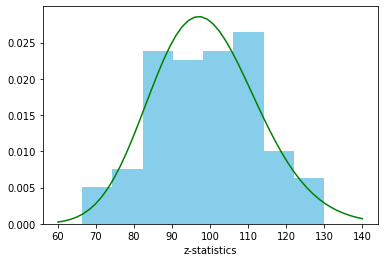

In [36]:
%matplotlib inline

x = np.linspace(60, 140)
y = sts.chi2.pdf(x, df=n-1)
plt.xlabel('Статистика Z')
plt.hist(z, bins=8, color='skyblue', density=True)
plt.plot(x, y, 'g')

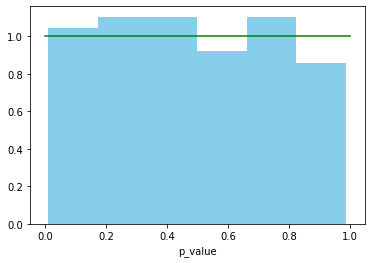

In [40]:
x = np.linspace(0, 1)
y = sts.uniform.pdf(x)
plt.xlabel('p_value')
plt.hist(p_value, bins=6, color='skyblue', density=True)
plt.plot(x, y, 'g')